<center><a target="_blank" href="https://academy.constructor.org/">
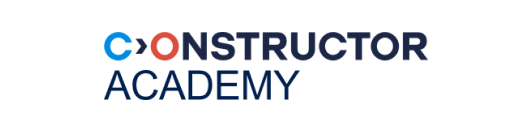</a> </center>
<hr />

# <h1 align="center"> Web Scraping with BeautifulSoup </h1>

<hr />
<center>Constructor Academy, 2025</center>

<!-- Last update: May 14, 2024 DB-->

## Table of Contents

- [1. Introduction to Webscraping](#1.-introduction-to-webscraping)
- [2. HTML Basics](#2.-html-basics)
- [3. The Requests Library](#3.-the-requests-library)
- [4. BeautifulSoup](#4.-beautifulsoup)

We can get a lot of data from several public and paid API's.

1. https://www.who.int/data/gho/  
2. https://data.fivethirtyeight.com/
3. https://data.gov/
4. https://data.unicef.org/
5. https://datasetsearch.research.google.com/

But what if we want to access data not offered this way? Data which we only see though a website's page.

## 1. Introduction to Webscraping

As we all know, the internet is a tremendous source of information, whatever your interest is. Ideally, every piece of interesting data would be available to download in the form of a csv file or equivalent, so that we could read it directly with pandas and start analyzing it. Of course, this is not the case.

The aim of this session is to demonstrate how you can extract information from web pages. This task is called
**Web scraping/web crawling**.

In Python, we use mainly 4 packages for web scraping/crawling:

- **[Requests](https://requests.readthedocs.io/en/master/user/quickstart/)**: is a package that lets you make http requests. In the context of web scraping, it allows you to get the content of a webpage, that can be further analyzed using a html parser.
- **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: is a library that allows you to extract information from html documents (but also xml, even though it is not relevant here.). This is exactly what we need since html is the standard language to write webpages.
- [Selenium](https://selenium-python.readthedocs.io): is a library you can use for web pages that are rendered in real-time (e.g. have to physically click buttons, scroll down, ...).
- [Scrapy](https://scrapy.org): is a library to create web-spiders, scripts that perform web-crawling.

In this course, we learn how to use requests in combination with BeautifulSoup to extract online data. To do so, we first need to understand how information is structured on a web page.

## 2. HTML Basics

HyperText Markup Language (HTML) is a language that web pages are created in. HTML is not a programming language, like Python — instead, it is a **markup language**: it tells browsers how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. Because HTML is not a programming language, it is not nearly as complex as Python.

### The components of a web page

When we visit a web page, our web browser makes a request to a web server. The server then sends back files that tell our browser how to render the page for us. The files fall into 4 main types:

* **HTML** — Contain the main content of the page.
* **CSS** — Add styling to make the page look nicer.
* **JS** — Javascript files add interactivity to web pages.
* **Images** — Image formats, such as JPG and PNG allow web pages to show pictures.


After our browser receives all the files, it renders the page and displays it to us. There's a lot that happens behind the scenes to render a page nicely, but we don't need to worry about most of it when web scraping: we are interested in the main content of the web page: HTML.

You can write html in the code cells of your jupyter notebook by using the `%%HTML` magic. Let's do that:

In [1]:
%%HTML

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Div Layout</title>
    <style>
        .container {
            display: flex;
        }
        .side-by-side {
            width: 50%;
            box-sizing: border-box;
            border: 2px solid black;
            background-color: lightgray;
            padding: 10px;
        }
        #main-top {
            margin-bottom: 20px;
            border: 2px solid black;
            background-color: lightblue;
            padding: 10px;
            text-align: center;
        }
        a {
            color: darkblue;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div id="main-top">
        <h1>Main Div at the Top</h1>
        <p>This is a <span>paragraph</span> with some text in the main div. <a href="https://www.example.com" target="_blank">Visit our site</a></p>
    </div>
    <div class="container">
        <div class="side-by-side">
            <h2>Side by Side Div 1</h2>
            <p>This is a <span>paragraph</span> with some text in the first side-by-side div.</p>
        </div>
        <div class="side-by-side">
            <h2>Side by Side Div 2</h2>
            <p>This is a <span>paragraph</span> with some text in the second side-by-side div. Here is a <a href="https://www.example2.com" target="_blank">link</a>.</p>
        </div>
    </div>
</body>
</html>

In [ ]:
## End of HTML example

In HTML, the information is organized in the form of nested elements. Each html element is delimited by tags, for example:

- **`<html>  ... </html>`** is the tag that defines the root element: it tells the web browser that everything inside of it is HTML.
- Right inside the HTML tag, we have **`<head> ... </head>`** and **`<body> ... </body>`** tags.
- The **`<p> ... </p>`** tag defines the paragraph, and any text inside the tag is shown as a separate paragraph.
- the **`<a> ... </a>`** tag declares a link to another webpage. The `href` property determines where the link goes.
- **``<div>``** — Indicates a division, or area, of the page.
- **``<b>``** — Bolds any text inside.
- **``<i>``** — Italicizes any text inside.
- **``<table>``** — Creates a table.
- **``<form>``** — Creates an input form.

Additionally, in HTML, apart from the generic `<div>`, there are specific types of “divs” or elements that help define the structure of a webpage more clearly:

1. **`<header>`**: Used for the top part of a page or section, often containing titles or navigation menus.
2. **`<footer>`**: Defines the bottom part, typically for copyright information or links.
3. **`<article>`**: Represents a self-contained piece of content, like a blog post or news article.
4. **`<section>`**: A generic section, usually with a heading, grouping thematically related content.
5. **`<nav>`**: For navigation links, helping users find different parts of a site.
6. **`<aside>`**: Used for tangentially related content, like sidebars.
7. **`<main>`**: Represents the main content of a page; there should be only one `<main>` per page.
8. **`<figure>` and `<figcaption>`**: For images, diagrams, or code, with `<figcaption>` providing a caption.
9. **`<details>` and `<summary>`**: Creates an expandable and collapsible section, with `<summary>` giving a brief heading.
10. **`<mark>`**: Highlights parts of text for emphasis.

Using these elements helps make your website more accessible and easier to understand, as they provide extra information about the role of each part of your page.

Checkout the full list of tags [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).



The best way to learn about html is to explore the source code of actual webpages. You can do that in your browser. The procedure is slightly different depending on web browsers, in google chrome, you can just type `Ctrl`/`Cmd` + `Shift` + `C`. This is the result you have if you visit [Job.ch](https://www.jobs.ch/en/vacancies/?term=Data%20Engineer) (searching for Data Engineer):

<center><a target="_blank" href="https://www.jobs.ch/">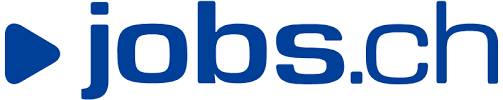</a> </center>

The pannel on the right side of the window shows you the raw html document. You can recognize the tags that we talked about and many more. While webscraping, we will alternate between this window and the jupyter notebook window.

Html elements can also contain **attributes**. Attributes provide extra information about an HTML element. All attributes are made up of two sections − a name and a value. Common attributes include `id`, `title`, `class` and `style`. These attributes are specified within the tags. For example checkout a close up from the same page source code:

![](https://lh3.googleusercontent.com/d/1I6exoU9KIzaXnHk9fC_w0btIMsOXCE7_)

`id` attributes a name to an HTML element, `class` assigns html elements to groups. These properties make elements easier to interact with when we are scraping. One element can have multiple classes, and a class can be shared between elements. Each element can only have one id and it can only be used once on a page. `class` and `id` are optional, and not all elements will have them.

## 3. The Requests Library

The first thing we need to do to scrape a web page is to download it. We can do so using the Python `requests` library. The requests library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us. After running our request, one gets a Response object. This object has a `status_code` property, which indicates if the page was downloaded successfully. A `status_code` of 200 means that the page downloaded successfully. We won't fully dive into status codes here, but a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.
The page content can be printed using `page.content`.

In [2]:
import requests

let's start with a simple page:

In [3]:
# making a request to a webpage
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(page)
print(page.status_code) ## prints 200 as status code
print(page.content) ## prints the entire webpage content

<Response [200]>
200
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


- When making a request to an external service, your system will need to wait for an answer before moving on.
- By default, requests waits indefinitely, so you should almost always specify a `timeout` duration to prevent your script from getting stuck:

In [4]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html", timeout=1) # timeout is for not lagging with the webpage server when it happens. 

The `timeout` variable denotes the maximum number of seconds that `requests.get()` will wait for an answer.

Let's see the content for the jobs.ch page:

In [7]:
page = requests.get(r"https://www.jobs.ch/en/vacancies/?term=python%20developer", timeout=2)
print(page)
print(page.status_code)
print(page.content[:1000])

ReadTimeout: HTTPSConnectionPool(host='www.jobs.ch', port=443): Read timed out. (read timeout=2)

As you can see, finding elements within `page.content` is difficult. That is where BeautifulSoup will assist us.

## 4. BeautifulSoup

BeautifulSoup is a html and xml parser. It means that it analyses the contents of a html or xml document and provides methods the access specific elements of the document. In this section, we will parse `page.content` using BeautifulSoup and create a pandas dataframe that contains:

- job title
- posting date
- company
- location
- link to job add

### Import libraries and parse the page content

In [8]:
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}
url = "https://www.jobs.ch/en/vacancies/?term=data%20scientist"
page = requests.get(url, headers=headers, timeout=2)
print(page.status_code)
page.content[:10000]

200


b'<!doctype html>\n<html  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    \n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n    \n\n    <title>210 Data scientist jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051ac1afa72e7a.woff2" fetchpriority="high" crossorigin />\n    \n\n    \n      <!-- Synchronous JS -->\n 

In [10]:
soup = BeautifulSoup(page.content, "html.parser") # converts the page content into a beautifulsoup object

In [11]:
type(soup)

bs4.BeautifulSoup

We now have a BeautifoulSoup object that contains all the content of the original webpage in a format that is much easier to access. For example you can extract all the text content of the page by typing:

In [ ]:
soup.get_text()[:5000]  # check a bit to make sure one is on the correct webpage

"\n\n\n\n\n\n\n\n210 Data scientist jobs - jobs.ch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentjobs.ch Navigation logoFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free DeutschFrançaisEnglishLoginFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free My accountLoginDon't have an account yet?Sign upSelect LanguageDeutschFrançaisEnglishSearchSmart SearchBetaFind better matchesFind better matchesJob title or keywordsdata scientistCity or regionChoose a regionSearchAll filtersPublished sinceWorkloadOccupational fieldContract typeLanguagePositionAll filters210 Data scientist job offersRelevanceNewestRelevance2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy applyLast weekPrincipal Machine Learning Engineer\x0cPlace of work:BernWorkload:100%Contract type:

You can find the first element that has tag `<a>...</a>` by typing:

In [ ]:
soup.find('a') # navigate to the page and find an HTML element

<a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none hover:td_underline c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand mr_s16" data-cy="header-logo" href="/en/" title="Home"><span class="ac_center d_inline-block lh_0 va_middle c_white h_[24px] w_[107px]"><span class="pos_absolute w_1px h_1px p_s0 ov_hidden clip_rect(0,_0,_0,_0) white-space_nowrap cp-path_inset(50%) bd_0">jobs.ch Navigation logo</span><svg aria-hidden="true" fill="currentColor" focusable="false" viewbox="0 0 120 24"><path d="m11.8,10.69l-7.8,-4.64c-2.2,-1.21 -4,-0.202 -4,2.42v9.277c0,2.52 1.8,3.63 4,2.32l7.9,-4.64c2.1,-1.31 2.1,-3.427 -0.1,-4.737"></path><path d="m35.9,5.647c-7.6,0 -8.5,1.815 -8.5,7.462s1,7.36 8.5,7.36s8.5,-1.816 8.5,-7.36c0,-5.65 -1,-7.464 -8.5,-7.464m0,12.202c-3.9,0 -4.2,-0.808 -4.2,-4.74s0.3,-4.84 4.2,-4.84s4.2,0.908 4.2,4.84c0,3.83 -0.3,4.74 -4.2,4.74m21,-12.203c-2.2,0 -4.5,0.303 -5.4,2.118h-0.2v-7.156c0,-0.303 -0.3,-0.

In [ ]:
soup.find('a').get_text() # content of that element

'jobs.ch Navigation logo'

And you can find all elements that have tags `<a>...</a>` by typing:

In [15]:
soup.find_all('a')[:3]

[<a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none hover:td_underline c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand mr_s16" data-cy="header-logo" href="/en/" title="Home"><span class="ac_center d_inline-block lh_0 va_middle c_white h_[24px] w_[107px]"><span class="pos_absolute w_1px h_1px p_s0 ov_hidden clip_rect(0,_0,_0,_0) white-space_nowrap cp-path_inset(50%) bd_0">jobs.ch Navigation logo</span><svg aria-hidden="true" fill="currentColor" focusable="false" viewbox="0 0 120 24"><path d="m11.8,10.69l-7.8,-4.64c-2.2,-1.21 -4,-0.202 -4,2.42v9.277c0,2.52 1.8,3.63 4,2.32l7.9,-4.64c2.1,-1.31 2.1,-3.427 -0.1,-4.737"></path><path d="m35.9,5.647c-7.6,0 -8.5,1.815 -8.5,7.462s1,7.36 8.5,7.36s8.5,-1.816 8.5,-7.36c0,-5.65 -1,-7.464 -8.5,-7.464m0,12.202c-3.9,0 -4.2,-0.808 -4.2,-4.74s0.3,-4.84 4.2,-4.84s4.2,0.908 4.2,4.84c0,3.83 -0.3,4.74 -4.2,4.74m21,-12.203c-2.2,0 -4.5,0.303 -5.4,2.118h-0.2v-7.156c0,-0.303 -0.3,-0

In [20]:
soup.find_all('div')[16]

<div class="c_brand.base avatarCircular avatarCircular--avatarSize_md" data-clarity-mask="true"><span class="icon icon--iconSize_sm" data-cy="icon-user-avatar"><svg aria-hidden="true" class="fill_[currentColor] h_100% w_100%" focusable="false" viewbox="0 0 24 24"><path d="M12 12c-1.1 0-2.042-.392-2.825-1.175C8.392 10.042 8 9.1 8 8s.392-2.042 1.175-2.825C9.958 4.392 10.9 4 12 4s2.042.392 2.825 1.175C15.608 5.958 16 6.9 16 8s-.392 2.042-1.175 2.825C14.042 11.608 13.1 12 12 12zm6 8H6c-.55 0-1.02-.196-1.412-.587A1.927 1.927 0 0 1 4 18v-.8c0-.567.146-1.088.438-1.563A2.914 2.914 0 0 1 5.6 14.55a14.866 14.866 0 0 1 3.15-1.163A13.776 13.776 0 0 1 12 13c1.1 0 2.183.129 3.25.387 1.067.259 2.117.646 3.15 1.163.483.25.87.612 1.162 1.087.292.475.438.996.438 1.563v.8a1.93 1.93 0 0 1-.587 1.413A1.928 1.928 0 0 1 18 20zM6 18h12v-.8a.943.943 0 0 0-.137-.5.977.977 0 0 0-.363-.35 13.03 13.03 0 0 0-2.725-1.013 11.615 11.615 0 0 0-5.55 0A13.03 13.03 0 0 0 6.5 16.35a.97.97 0 0 0-.5.85v.8zm6-8c.55 0 1.021-.1

In [19]:
soup.find_all('div')[16].text

''

In [25]:
soup.find_all('a')[25].text

'5 days ago(Senior) Data Science & Data Analytics Consultant 60-100%Place of work:Zürich, Lausanne, BernWorkload:60 – 100%Contract type:Unlimited employment Eraneos Switzerland AG'

but you can also filter through tags using attributes:

In [ ]:
soup.find('a').text # this is to find the first 'a' item

'jobs.ch Navigation logo'

In [ ]:
soup.find('a', {"data-cy": "job-link"}).text # this is to find the first 'a' item that is related to an attribute, like job link here

'2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy apply'

In [32]:
soup.find('a', {"data-cy": "job-link"}).attrs # check out all attributes from a dictionary object

{'data-cy': 'job-link',
 'id': 'vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab',
 'tabindex': '0',
 'title': 'Data Scientist',
 'class': ['cursor_pointer',
  'trs-dur_d125',
  'trs-prop_color',
  'trs-tmf_ease-out',
  'td_none',
  'c_colorPalette.base',
  'hover:c_colorPalette.hover',
  'visited:c_colorPalette.visited',
  'color-palette_link.brand',
  'd_block',
  'wb_break-word',
  'h_100%',
  'group'],
 'href': '/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'}

In [ ]:
soup.find('a', {"data-cy": "job-link"}).get('href') # get something from the a dictionary attribute

'/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

In [41]:
soup.find_all('a', {"data-cy": "job-link"})[:2]

[<a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand d_block wb_break-word h_100% group" data-cy="job-link" href="/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/" id="vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab" tabindex="0" title="Data Scientist"><div class="d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative" data-cy="vacancy-serp-item-active"><div class="d_flex jc_space-between mb_s12" data-cy="serp-item-9de7145c-d836-4e00-9b5d-d5f68d83d2ab"><p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap">2 weeks ago</p><button aria-label="Save job" aria-pressed="false" class="color-palette_button.brand pos_absolute right_s4 top_s4 iconButton iconButton--buttonSize_md iconButton--buttonType_blended notranslate" data-cy="bookmark-icon-unchecked" id="vacancy-bookmark-icon-9de7145c-d836-4e00-9b

In [33]:
soup.find_all('a', {'class': 'A-sc-1q4zv2a-0'})[0:3]

[]

In [ ]:
soup.find_all('a', {'class': ['A-sc-1q4zv2a-0 gFUeCQ Link-sc-czsz28-2 sc-dcJsrY']})[1] # old code; class not updated

IndexError: list index out of range

Yet, when we separate the tags with a comma, it instructs the query to find a tag containing at least one of the given values, not necessarily all of them.

In [ ]:
soup.find_all('a', {'class': ['A-sc-1q4zv2a-0', 'eMGuAx', 'Link-sc-czsz28-2', 'bzpUGN']})[:1]

[<a aria-selected="false" class="A-sc-1q4zv2a-0 gFUeCQ Link-sc-czsz28-2 sc-dcJsrY bXaQoj dvPTHl LanguageSwitch___StyledContextMenuLinkItem-sc-1biraw8-0 gUbQQF" data-cy="language-menu-item" href="/de/stellenangebote/?term=data%20scientist"><span class="Span-sc-1ybanni-0 ContextMenuItem___StyledSpan2-sc-1d471t4-0 ihATYV yBZno">Deutsch</span></a>]

If we are trying to be more specific with our query, we can use the `.select()` method. Selectors provide a way to select and manipulate HTML elements based on their id, class, attributes, and hierarchy in the document.

In comparison to `.find()`, `.select()` requires that all the values given in the query are a match.

In [ ]:
soup.select('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN')[:1]

[]

Once you have an element of interest, you can extract data using:

In [ ]:
soup.select_one('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN').get_text()

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
soup.select_one('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN').get('href')

'https://www.mozilla.org/en-US/firefox/new/'

Now that we know how to extract data from a webpage, let's find the relevant html elements for our project. We need to locate them in the original page:

### Browse the source code in a web browser

The html code inspector is slightly different depending on your web browser. here we use Chrome. With Chrome, we can select the following icon at the top of the code inspector tab:

![](https://lh3.googleusercontent.com/d/1piq5H0kGqufsgeKQTs5VifXCGwDBVs1e)

This allows us to select any component of the page and find the corresponding element in the html code. Let's do this for the list of jobs:

![](https://lh3.googleusercontent.com/d/1gpxxDzK0WZR73rLGNVIHkHEqP17X1CN_)

After navigating within the html element tree, we observe that each job box is a seperate `div`element and has the `class` attribute `VacancySerpItem__ShadowBox-qr45cp-0`.

![](https://lh3.googleusercontent.com/d/1p3_xg7cS8Era6dl4dHKsePxAtprMNeYR)

Note that websites get updated, so the name of the class might be different by the time you follow this tutorial!

Here, we can get the html element for a job by typing:

In [43]:
one_job_ad = soup.find('article', {'class' : 'Div-sc-1cpunnt-0'})
one_job_ad

To find all of them, we can write:

In [46]:
job_ads = soup.find_all('div', {'data-cy' : 'serp-item'})

In [47]:
len(job_ads)

20

we obtain a list of 23 job ads! Each component of the list contains the html element describing the job ad:

In [48]:
job_ads[0]

<div class='after:bdr_r16 after:bx-sh_bs50 after:content_"" after:d_block after:h_100% after:isolation_isolate after:left_s0 after:op_0 after:pointer-events_none after:pos_absolute after:top_s0 after:trs-dur_d125 after:trs-prop_opacity after:trs-tmf_ease-out after:w_100% after:will-change_opacity bd_[1px_solid_{colors.brand.60}] hover:after:op_0 active:after:op_0 bdr_r16 h_100% pos_relative' data-cy="serp-item"><a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand d_block wb_break-word h_100% group" data-cy="job-link" href="/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/" id="vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab" tabindex="0" title="Data Scientist"><div class="d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative" data-cy="vacancy-serp-item-active"><div class="d_flex jc_space-between mb_s12" data-cy="serp-item-9de7145c-d83

now that we have identified the data blocks for jobs, we can extract the individual pieces of information. Let's start with the link to the job ad. This will be located within a `<a>` tag, and we are interested in the `href` attribute:

In [49]:
job_ads[0].find('a').get('href')

'/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

Obtaining the link can be done without specifying any attribute, as that is the sole content of the `a` tag in one job-ad box. However, it is advisable to specify the attribute to prevent confusion or in cases where there could be more than one `a` tag.

In [ ]:
job_ads[0].find('a', {'data-cy': 'job-link'}).get('href')

'/en/vacancies/detail/1761ead5-cd4d-4502-a6a1-e8ea8a36b313/?source=vacancy_search_promo'

We get the link to the job ad page but to access the page from outside, we need to add 'https://www.jobs.ch' as prefix:

In [ ]:
'https://www.jobs.ch' + job_ads[0].find('a',{'data-cy' : 'job-link'}).get('href')

let's check it works for other links:

In [ ]:
['https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href') for job in job_ads]

['https://www.jobs.ch/en/vacancies/detail/1761ead5-cd4d-4502-a6a1-e8ea8a36b313/?source=vacancy_search_promo',
 'https://www.jobs.ch/en/vacancies/detail/1e2d4bcc-496e-4b2f-b8a1-e24c6d5df629/?source=vacancy_search_promo',
 'https://www.jobs.ch/en/vacancies/detail/6bd7e6a1-12ef-413b-89e8-606edce8ef67/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/f29e20b2-750a-4ffc-bd6d-dd43c99f80ee/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/ac6ec8b4-a5fe-484b-a48a-a20e4410149a/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/e2bc3bfc-d8dc-461a-96d0-62558b6e79f3/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/1097dc27-7e32-4c7f-96fb-ebf9dfbbd0a5/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/1bac11a2-587a-429b-bcd7-d90129ece208/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/64268273-d7db-45a3-8b2b-1bf7f93ad60d/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/8cbba32c-0

now we can see that in the `<a>`element, we have an attribute called title, which corresponds the the title of the ad:

In [ ]:
job_ads[0].find('a',{'data-cy' : 'job-link'}).get('title')

'Principal Machine Learning Engineer\x0c'

In [ ]:
job_title = []
for i in range(len(job_ads)):
    job_title.append(job_ads[i].find('a',{'data-cy' : 'job-link'}).get('title'))
job_title

# or simply print it.

['Data Scientist',
 'Principal Machine Learning Engineer\x0c',
 'Head of Data Engineering (f/m/d) | 80-100% | Hybrid working model | Zurich, Switzerland',
 'Spezialist Ereignisanalyse und Erfahrungsauswertung 80% - 100% (alle)',
 'ML / Data Science Specialist (80-100%)',
 'Statistische*r Datanalyst*in (60% bis 100%)',
 'Working student in Business Intelligence/ Data analytics (f/m/d)',
 '(Senior) Data Science & Data Analytics Consultant 60-100%',
 'Analyste de données pour le controlling des achats',
 'Data Analyst (Focus Online-Shops)',
 'Datenanalyst/-in Polizeiliche Lage 100%',
 '(Senior) Data Analyst Marketing (m/f/d)',
 'Datenanalyst/-in Beschaffungscontrolling',
 'Responsable des données de comptage à 100%',
 'Data Scientist Asset Finance & Information (alle)',
 'Product Development Intern (f/m/d)',
 'BAUINGENIEUR*IN – TECHNISCHE*R LEITER*IN - BERN',
 'Full Stack Software Engineer - Java 80-100%',
 'Analytical Cloud Software Engineer (all genders)',
 'Data Engineer (m/f/d) - 100%

In [61]:
job_ads[0].find_all('p')

[<p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap">2 weeks ago</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Lausanne</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">80 – 100%</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Unlimited employment</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90"><strong>SamanTree Medical (Switzerland) SA</strong></p>]

In [64]:
date = job_ads[0].find_all('p')[0].text
loc = job_ads[0].find_all('p')[1].text
workload = job_ads[0].find_all('p')[2].text
date, loc, workload

('2 weeks ago', 'Lausanne', '80 – 100%')

However, we require additional details about the job posting. Upon examining the child tags, we observe that the remaining information is encapsulated within `p` tags. Regardless of whether these `p` tags contain further tags as a child or not, we can still retrieve the text from the child taga, if they exist.

In [ ]:
job_ads[0].find_all('p', {'class' : 'Span-sc-1ybanni-0'})

[<p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 VacancySerpItemUpdated___StyledText-sc-i0986f-4 gVjNwq bZOJvH"><span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 23 January 2024</span><span aria-hidden="true" class="Span-sc-1ybanni-0" title="23 January 2024">23 Jan</span></p>,
 <p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 cMsiEU">Schlieren</p>,
 <p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 cMsiEU">80% – 100%</p>,
 <p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 cMsiEU">Unlimited employment</p>,
 <p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 cMsiEU"><strong>Zühlke Engineering AG</strong></p>]

This way, we notice that it always come in the following order:

- job title
- company
- location
- date of publication

we can then extract the data using `find_all` and `.get_text()`:

In [ ]:
for section in job_ads[0].find_all('p', {'class' : 'Span-sc-1ybanni-0'}):
    print(section.get_text())

Published: 23 January 202423 Jan
Schlieren
80% – 100%
Unlimited employment
Zühlke Engineering AG


However, some items may not display the information in a suitable format, such as the date in this example. This is why we might need to scrape each tag independently in certain cases. It all depends on how the data is presented.

In [ ]:
job_ads[0].select_one('p > span.ftUOUz')

<span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 23 January 2024</span>

In [ ]:
job_ads[0].select_one('p > span.ftUOUz').find_next()

<span aria-hidden="true" class="Span-sc-1ybanni-0" title="23 January 2024">23 Jan</span>

Now, we can programmatically create a dataframe containing all the job posts found on the scraped page.

In [ ]:
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

profession = "Data Scientist"
processed_profesion = profession.lower().replace(" ", "%20")   # %20 stands for a space in html code

url = f"https://www.jobs.ch/en/vacancies/?page=1&term={processed_profesion}"


In [ ]:
import time


In [ ]:
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

profession = "Data Scientist"
processed_profession = profession.lower().replace(" ", "%20")

url = f"https://www.jobs.ch/en/vacancies/?page=1&term={processed_profession}"

# /?page={page}&term={processed_profession}
# can loop aroud the page
# automatize the process of finding/getting the max. page
# soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[1]    # split is done based on spaces
time.sleep(2)  # in sec; put the sleep before the request so it is more like a human-based operations than a machine operation
page = requests.get(url, headers=headers, timeout=2)
soup = BeautifulSoup(page.content, "html.parser")


job_ads = soup.find_all('article', {'class' : 'Div-sc-1cpunnt-0'})

df = pd.DataFrame(columns=['profession', 'title', 'query'])     # add columns that apply

for job in job_ads:
    try:
        title = job.find('a',{'data-cy' : 'job-link'}).get('title')    # title
    except AttributeError:                         # note the error we encounter and except those.
        title = None

    try:
        location = job.find_all('p', {'class' : 'Span-sc-1ybanni-0'})[1].get_text()    # location
    except AttributeError:
        location = None

    try:
        date = job.select_one('p > span.ftUOUz').get_text()    # date
    except AttributeError: 
        date = None

    try:
        query = job.find('a', {'data-cy': 'job-link'}).get('href')   # link 
    except AttributeError:
        query = None


    job_dict = {
                "profession": profession,
                "title": title,
                "location": location,
                "date": date,
                "query": query
            }

    df = pd.concat(
        [df, pd.DataFrame([job_dict])],
        ignore_index=True,     # remove all index values, otherwise put False
    )

In [ ]:
df

,profession,title,query,location,date
0,Data Scientist,Senior Data Engineer,/en/vacancies/detail/1761ead5-cd4d-4502-a6a1-e...,Schlieren,Published: 23 January 2024
1,Data Scientist,Business Analyst Supply Chain,/en/vacancies/detail/1e2d4bcc-496e-4b2f-b8a1-e...,Haag,Published: 26 January 2024
2,Data Scientist,GIS Specialist / GIS Data Scientist 80-100% (m...,/en/vacancies/detail/6bd7e6a1-12ef-413b-89e8-6...,Zürich,Published: 07 February 2024
3,Data Scientist,Data Scientist / Analyst (m/w/d),/en/vacancies/detail/f29e20b2-750a-4ffc-bd6d-d...,Domat/Ems,Published: 13 February 2024
4,Data Scientist,Data Scientist for LLM Applications f/m/d,/en/vacancies/detail/ac6ec8b4-a5fe-484b-a48a-a...,Graz,Published: 13 February 2024
5,Data Scientist,Datenspezialist/-in CAFM / SAP,/en/vacancies/detail/e2bc3bfc-d8dc-461a-96d0-6...,Zürich,Published: 09 February 2024
6,Data Scientist,Data Engineering Lead Consultant in Basel,/en/vacancies/detail/1097dc27-7e32-4c7f-96fb-e...,"Basel, Luzern",Published: 07 February 2024
7,Data Scientist,Data Analyst,/en/vacancies/detail/1bac11a2-587a-429b-bcd7-d...,Nyon,Published: 12 February 2024
8,Data Scientist,Datenanalyst/in / Ökonom/in 50-100%,/en/vacancies/detail/64268273-d7db-45a3-8b2b-1...,Solothurn,Published: 29 January 2024
9,Data Scientist,Professional Data & BI Specialist,/en/vacancies/detail/8cbba32c-0bfa-4312-9757-2...,Bern,Published: 07 February 2024


### Saving Extracted Data

In [ ]:
df.to_csv("data_scientist_jobs.csv")

## Conclusion:

You now know the most important commands to work with requests and BeautifulSoup and have fun extracting data from webpages!
If you would like to go further, here are resources you should checkout:

* [Web Scraping Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Selenium](https://www.seleniumhq.org/) a library for javascript rendered pages,
* [Scrapy](https://scrapy.org) a python library for web crawling

But first, let's practice!